# **DS 3001 Final Project - Project Results**

Luke McMeans (@McMeans), Nithil Suresh (@Nithil-Suresh), Bay Wiggins (@baywigg)

# Importing/Preparing Data

In [3]:
# relevant imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import StandardScaler

In [ ]:
# load and show df
df = pd.read_csv('./clean_data/kenpom_barttorvik_clean.csv')
df

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
0,2025,Akron,2,MAC,2,13,64,113.7490,66,107.1760,...,36.6,52,31.9,75,45.4,52,38.0,152,2.383,73
1,2025,Alabama,3,SEC,2,2,8,126.5980,4,96.6919,...,35.0,116,30.8,32,46.2,43,35.1,59,1.819,261
2,2025,Alabama St.,4,SWAC,4,16,64,101.4540,271,110.6890,...,32.9,224,33.4,160,42.9,85,39.5,206,2.346,83
3,2025,Arizona,8,B12,2,4,16,122.5670,13,96.8244,...,32.4,250,33.6,171,34.6,295,41.9,285,1.920,225
4,2025,Arkansas,10,SEC,3,10,16,112.9430,73,95.2503,...,33.3,204,31.9,75,36.7,242,39.5,206,1.364,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2008,West Virginia,235,BE,1,7,16,113.5700,33,93.4302,...,35.8,142,35.4,188,35.0,155,32.1,98,1.679,181
1084,2008,Western Kentucky,236,SB,1,12,16,111.0760,54,97.0110,...,38.6,34,32.5,48,32.4,211,31.6,87,2.066,55
1085,2008,Winthrop,239,BSth,4,13,64,99.6932,230,92.3864,...,37.4,79,31.0,23,31.7,231,42.8,332,1.963,89
1086,2008,Wisconsin,240,B10,3,3,16,113.6190,32,86.2081,...,35.9,135,31.1,24,31.1,246,32.8,122,1.939,98


# Approach 1 - Logistic Regression

We’ll establish a baseline by doing a logistic regression. This feels like the most simple approach, and has good prevention of overfitting, if the correct regularization is applied. Along with this, logistic regression works better than most with smaller datasets. Though we have a lot of data to work with, we only have 16 tournaments overall, so this information could prove to be beneficial. It also can help determine which statistics (features) are most important in determining how far a team goes.

In [5]:
! git clone -b results https://github.com/baywigg/DS3001Group.git

Cloning into 'DS3001Group'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 114 (delta 56), reused 41 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (114/114), 1.26 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [6]:
import os

print(os.getcwd())

/content


In [7]:
# temporary way to read in data for me (nithil)
# previous method didn't work
df = pd.read_csv('/content/DS3001Group/clean_data/kenpom_barttorvik_clean.csv')
df

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
0,2025,Akron,2,MAC,2,13,64,113.7490,66,107.1760,...,36.6,52,31.9,75,45.4,52,38.0,152,2.383,73
1,2025,Alabama,3,SEC,2,2,8,126.5980,4,96.6919,...,35.0,116,30.8,32,46.2,43,35.1,59,1.819,261
2,2025,Alabama St.,4,SWAC,4,16,64,101.4540,271,110.6890,...,32.9,224,33.4,160,42.9,85,39.5,206,2.346,83
3,2025,Arizona,8,B12,2,4,16,122.5670,13,96.8244,...,32.4,250,33.6,171,34.6,295,41.9,285,1.920,225
4,2025,Arkansas,10,SEC,3,10,16,112.9430,73,95.2503,...,33.3,204,31.9,75,36.7,242,39.5,206,1.364,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2008,West Virginia,235,BE,1,7,16,113.5700,33,93.4302,...,35.8,142,35.4,188,35.0,155,32.1,98,1.679,181
1084,2008,Western Kentucky,236,SB,1,12,16,111.0760,54,97.0110,...,38.6,34,32.5,48,32.4,211,31.6,87,2.066,55
1085,2008,Winthrop,239,BSth,4,13,64,99.6932,230,92.3864,...,37.4,79,31.0,23,31.7,231,42.8,332,1.963,89
1086,2008,Wisconsin,240,B10,3,3,16,113.6190,32,86.2081,...,35.9,135,31.1,24,31.1,246,32.8,122,1.939,98


In [8]:
lr_df = df.copy()

In [ ]:
lr_df.head(50)

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
0,2025,Akron,2,MAC,2,13,64,113.749,66,107.1760,...,36.6,52,31.9,75,45.4,52,38.0,152,2.383,73
1,2025,Alabama,3,SEC,2,2,8,126.598,4,96.6919,...,35.0,116,30.8,32,46.2,43,35.1,59,1.819,261
2,2025,Alabama St.,4,SWAC,4,16,64,101.454,271,110.6890,...,32.9,224,33.4,160,42.9,85,39.5,206,2.346,83
3,2025,Arizona,8,B12,2,4,16,122.567,13,96.8244,...,32.4,250,33.6,171,34.6,295,41.9,285,1.920,225
4,2025,Arkansas,10,SEC,3,10,16,112.943,73,95.2503,...,33.3,204,31.9,75,36.7,242,39.5,206,1.364,341
5,2025,Auburn,12,SEC,4,1,4,128.505,1,93.4663,...,36.8,42,29.2,5,40.6,139,34.8,51,2.573,20
6,2025,Baylor,14,B12,2,9,32,120.886,16,99.7268,...,34.7,131,35.4,279,40.2,150,40.8,254,1.871,245
7,2025,Bryant,21,AE,4,15,64,106.725,178,105.5470,...,33.4,198,32.2,87,34.8,286,36.0,90,2.502,38
8,2025,BYU,25,B12,2,6,16,123.050,12,100.6540,...,37.1,33,34.8,246,48.3,16,44.4,332,1.889,239
9,2025,Clemson,33,ACC,1,5,64,118.690,24,94.7724,...,37.2,31,32.2,87,38.4,186,38.3,161,2.503,37


Setting up the data

In [ ]:
lr_df.columns

Index(['round', 'Intercept', 'seed', 'kadj_o', 'kadj_o_rank', 'kadj_d',
       'kadj_d_rank', 'kadj_t', 'kadj_t_rank', 'kadj_em', 'kadj_em_rank',
       'badj_o', 'badj_o_rank', 'badj_d', 'badj_d_rank', 'barthag',
       'barthag_rank', 'efg', 'efg_rank', 'efgd', 'efgd_rank', 'tov',
       'tov_rank', 'tovd', 'tovd_rank', 'oreb', 'oreb_rank', 'team', 'conf',
       'year'],
      dtype='object')

Separating variables into numeric and categorical

In [9]:
lr_df['Intercept'] = np.ones(lr_df.shape[0])

num_var = ['Intercept', 'seed', 'kadj_o', 'kadj_o_rank', 'kadj_d', 'kadj_d_rank', 'kadj_t', 'kadj_t_rank',
       'kadj_em', 'kadj_em_rank', 'badj_o', 'badj_o_rank', 'badj_d',
       'badj_d_rank', 'barthag', 'barthag_rank', 'efg', 'efg_rank', 'efgd',
       'efgd_rank', 'tov', 'tov_rank', 'tovd', 'tovd_rank', 'oreb',
       'oreb_rank', 'dreb', 'dreb_rank', 'ftr', 'ftr_rank', 'ftrd',
       'ftrd_rank', '2pt', '2pt_rank', '2ptd', '2ptd_rank', '3pt', '3pt_rank',
       '3ptd', '3ptd_rank', '3ptr', '3ptr_rank', '3ptrd', '3ptrd_rank', 'exp',
       'exp_rank']

cat_var = ['team', 'conf', 'year']

lr_df = lr_df.loc[:, ['round']+num_var+cat_var ]

Setting up variables to run the logistic regression. This includes creating dummy variables for the categorical variables.

In [10]:
# Outcome variable:
y = lr_df['round']

# Numeric variables:
X_n = lr_df.loc[:,num_var]

dummies = pd.DataFrame([]) # In general, use lists and append instead of DataFrame and pd.concat
for var in cat_var:
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)

# Combine numeric and dummy variables:
X = pd.concat([X_n,dummies],axis=1)
X.columns = X.columns.astype(str) # Add column names

Train test split. Test data is 20% of the original data.

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Below, we are running the logistic regression. For the solver, we chose LBFGS instead of the Newton-Cholesky as the latter method was giving us some errors. The stopping condition for the regression was set at 1000 iterations and this is stopping condition was reached when we ran the regression. The accuracy of the regression is 0.509.

In [27]:
## Run regression:
import random
from sklearn.linear_model import LogisticRegression

random.seed(42)

# Fit logistic regression:
reg = LogisticRegression(penalty = None,
                         fit_intercept=True,
                         solver = 'lbfgs',
                         max_iter=1000).fit(X_train,y_train)

print('Accuracy: ', reg.score(X_test,y_test))

Accuracy:  0.5091743119266054


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


One of the primary purposes of the logistic regression is to figure out which variables are good at predicting how far a team gets in the tournament. According to the regression, the top 3 indicates are KenPom's Adjusted Efficieny Margin, Barttorvik Adjusted Offensive Efficiency, and Turnover Percentage.

In [28]:
pd.DataFrame({'Variable':reg.feature_names_in_,'Coefficient':reg.coef_[0]}).sort_values(by='Coefficient', ascending = False)

,Variable,Coefficient
8,kadj_em,0.105698
10,badj_o,0.084641
20,tov,0.080527
299,253,0.077808
2,kadj_o,0.074473
...,...,...
1,seed,-0.089619
6,kadj_t,-0.096206
9,kadj_em_rank,-0.105644
26,dreb,-0.107589


Below is a cross tabulation of the model's prediction of how far a team progresses in the tournament versus how far they actually went. The columns represent the model's predictions and the rows represent the actual results.

In [29]:
y_pred = reg.predict(X_test)
acc = np.trace(pd.crosstab(y_test, y_pred)) / len(y_test)

print(pd.crosstab(y_test,y_pred))
# columns are the prediction, rows are the actual values

print(acc)

col_0  1   2   4   8   16  32  64
round                            
1       0   0   0   1   1   0   1
2       0   0   1   0   2   0   0
4       1   1   0   0   1   1   3
8       0   1   0   2   4   4   3
16      1   1   0   2   4  11   8
32      0   3   0   3   4  15  30
64      0   1   0   0   3  15  90
0.5091743119266054


In [30]:
actual_and_pred_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
actual_and_pred_df

,Actual,Predicted
780,8,64
1060,64,64
796,64,64
847,64,64
998,8,8
...,...,...
41,64,64
956,4,32
784,64,64
962,16,64


In [31]:
actual_and_pred_indexed = actual_and_pred_df.reset_index(drop=False)
actual_and_pred_indexed

,index,Actual,Predicted
0,780,8,64
1,1060,64,64
2,796,64,64
3,847,64,64
4,998,8,8
...,...,...,...
213,41,64,64
214,956,4,32
215,784,64,64
216,962,16,64


In [32]:
lr_df_indexed = lr_df.reset_index(drop=False)
lr_df_indexed

,index,round,Intercept,seed,kadj_o,kadj_o_rank,kadj_d,kadj_d_rank,kadj_t,kadj_t_rank,...,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank,team,conf,year
0,0,64,1.0,13,113.7490,66,107.1760,183,71.4456,16,...,75,45.4,52,38.0,152,2.383,73,Akron,MAC,2025
1,1,8,1.0,2,126.5980,4,96.6919,31,74.9404,1,...,32,46.2,43,35.1,59,1.819,261,Alabama,SEC,2025
2,2,64,1.0,16,101.4540,271,110.6890,256,67.8240,142,...,160,42.9,85,39.5,206,2.346,83,Alabama St.,SWAC,2025
3,3,16,1.0,4,122.5670,13,96.8244,32,69.9324,54,...,171,34.6,295,41.9,285,1.920,225,Arizona,B12,2025
4,4,16,1.0,10,112.9430,73,95.2503,20,69.4097,68,...,75,36.7,242,39.5,206,1.364,341,Arkansas,SEC,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,1083,16,1.0,7,113.5700,33,93.4302,24,63.0942,225,...,188,35.0,155,32.1,98,1.679,181,West Virginia,BE,2008
1084,1084,16,1.0,12,111.0760,54,97.0110,60,66.5432,99,...,48,32.4,211,31.6,87,2.066,55,Western Kentucky,SB,2008
1085,1085,64,1.0,13,99.6932,230,92.3864,17,60.9746,296,...,23,31.7,231,42.8,332,1.963,89,Winthrop,BSth,2008
1086,1086,16,1.0,3,113.6190,32,86.2081,2,60.8809,300,...,24,31.1,246,32.8,122,1.939,98,Wisconsin,B10,2008


In [33]:
log_analysis_df = pd.merge(lr_df_indexed, actual_and_pred_indexed, on = "index", how = "inner")
log_analysis_df

,index,round,Intercept,seed,kadj_o,kadj_o_rank,kadj_d,kadj_d_rank,kadj_t,kadj_t_rank,...,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank,team,conf,year,Actual,Predicted
0,3,16,1.0,4,122.567,13,96.8244,32,69.9324,54,...,295,41.9,285,1.920,225,Arizona,B12,2025,16,32
1,10,32,1.0,12,116.276,44,98.9770,49,66.0287,252,...,89,37.9,148,2.033,187,Colorado St.,MWC,2025,32,64
2,16,64,1.0,9,115.468,52,96.1035,26,66.4963,220,...,239,40.6,245,1.393,339,Georgia,SEC,2025,64,32
3,19,64,1.0,13,118.496,25,109.1810,227,66.4904,222,...,174,36.0,90,2.445,57,High Point,BSth,2025,64,64
4,24,16,1.0,3,123.868,8,99.6111,57,71.0130,24,...,115,43.5,317,2.329,88,Kentucky,SEC,2025,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,1060,64,1.0,13,104.822,147,93.6893,27,62.6931,248,...,185,27.2,13,2.475,6,Oral Roberts,Sum,2008,64,64
214,1072,16,1.0,2,117.787,7,95.4494,43,69.5841,21,...,66,35.6,220,1.716,168,Tennessee,SEC,2008,16,8
215,1074,32,1.0,9,112.029,46,92.4268,18,61.5639,285,...,270,30.7,50,1.611,199,Texas A&M,B12,2008,32,64
216,1083,16,1.0,7,113.570,33,93.4302,24,63.0942,225,...,155,32.1,98,1.679,181,West Virginia,BE,2008,16,32


Here we are looking at what the model mispredicted

In [34]:
mispredicted_df = log_analysis_df[log_analysis_df['Actual'] != log_analysis_df['Predicted']]
mispredicted_df['Difference'] = abs(mispredicted_df['Actual'] - mispredicted_df['Predicted'])
mispredicted_df

<ipython-input-34-99393b4e5791>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mispredicted_df['Difference'] = abs(mispredicted_df['Actual'] - mispredicted_df['Predicted'])


,index,round,Intercept,seed,kadj_o,kadj_o_rank,kadj_d,kadj_d_rank,kadj_t,kadj_t_rank,...,3ptrd,3ptrd_rank,exp,exp_rank,team,conf,year,Actual,Predicted,Difference
0,3,16,1.0,4,122.567,13,96.8244,32,69.9324,54,...,41.9,285,1.920,225,Arizona,B12,2025,16,32,16
1,10,32,1.0,12,116.276,44,98.9770,49,66.0287,252,...,37.9,148,2.033,187,Colorado St.,MWC,2025,32,64,32
2,16,64,1.0,9,115.468,52,96.1035,26,66.4963,220,...,40.6,245,1.393,339,Georgia,SEC,2025,64,32,32
4,24,16,1.0,3,123.868,8,99.6111,57,71.0130,24,...,43.5,317,2.329,88,Kentucky,SEC,2025,16,2,14
5,25,64,1.0,12,112.496,80,98.9632,48,65.3931,284,...,34.4,43,2.265,110,Liberty,CUSA,2025,64,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1053,16,1.0,5,115.444,18,94.5625,35,62.7366,243,...,37.7,273,1.610,200,Michigan St.,B10,2008,16,32,16
214,1072,16,1.0,2,117.787,7,95.4494,43,69.5841,21,...,35.6,220,1.716,168,Tennessee,SEC,2008,16,8,8
215,1074,32,1.0,9,112.029,46,92.4268,18,61.5639,285,...,30.7,50,1.611,199,Texas A&M,B12,2008,32,64,32
216,1083,16,1.0,7,113.570,33,93.4302,24,63.0942,225,...,32.1,98,1.679,181,West Virginia,BE,2008,16,32,16


These are the biggest mispredictions by the model. The biggest misprediction of the regression was predicting that Connecticut would be knocked out of the tournament in the first round yet they went on to win the 2014 national championship. Another notable misprediction is the infamous 2018 one seeded Virginia team that got knocked out in the first round to University of Maryland Baltimore Campus. The model predicted Virginia to make it to the Sweet 16. However, even this prediction isn't so terrible because the model still predicted an underperformance of the number one seeded team.

In [35]:
biggest_mispredictions = mispredicted_df.sort_values(by='Difference', ascending=False)
biggest_mispredictions[['year', 'team', 'seed', 'Actual', 'Predicted']].head(20)

,year,team,seed,Actual,Predicted
126,2014,Connecticut,7,1,64
150,2013,Wisconsin,5,64,2
94,2017,South Carolina,7,4,64
176,2011,VCU,11,4,64
199,2009,Villanova,3,4,64
185,2010,Tennessee,6,8,64
152,2012,Florida,7,8,64
128,2014,Dayton,11,8,64
76,2018,Nevada,7,16,64
37,2022,Iowa St.,11,16,64


In [36]:
predicted_df = log_analysis_df[log_analysis_df['Actual'] == log_analysis_df['Predicted']]
predicted_df

,index,round,Intercept,seed,kadj_o,kadj_o_rank,kadj_d,kadj_d_rank,kadj_t,kadj_t_rank,...,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank,team,conf,year,Actual,Predicted
3,19,64,1.0,13,118.496,25,109.1810,227,66.4904,222,...,174,36.0,90,2.445,57,High Point,BSth,2025,64,64
9,41,64,1.0,16,107.201,168,108.7230,217,66.4103,226,...,360,42.7,301,2.602,14,Norfolk St.,MEAC,2025,64,64
11,54,64,1.0,12,115.290,57,96.5133,30,65.7295,271,...,8,44.3,328,2.447,55,UC San Diego,BW,2025,64,64
12,59,64,1.0,11,116.251,45,95.5473,22,66.1584,241,...,27,35.3,68,2.233,118,VCU,A10,2025,64,64
13,72,64,1.0,13,113.736,58,106.1280,176,69.7757,59,...,16,36.9,176,1.788,256,College of Charleston,CAA,2024,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1036,64,1.0,14,110.651,58,105.6070,207,67.2439,81,...,155,33.7,150,1.552,220,Cornell,Ivy,2008,64,64
208,1040,64,1.0,12,111.486,50,101.2070,122,60.9624,298,...,190,33.0,128,1.976,84,George Mason,CAA,2008,64,64
210,1042,64,1.0,14,104.018,167,96.1227,47,64.1104,184,...,238,34.9,197,1.677,183,Georgia,SEC,2008,64,64
211,1050,32,1.0,6,113.463,34,91.6188,14,66.3008,107,...,181,31.1,65,1.839,126,Marquette,BE,2008,32,32


In [37]:
upsets_predicted_df = predicted_df[
    ((predicted_df['seed'] == 1) & (predicted_df['Predicted'] != 4)) |
    ((predicted_df['seed'] == 2) & (predicted_df['Predicted'] != 8)) |
    ((predicted_df['seed'].between(3, 4)) & (predicted_df['Predicted'] != 16)) |
    ((predicted_df['seed'].between(5, 8)) & (predicted_df['Predicted'] != 32)) |
    ((predicted_df['seed'].between(9, 16)) & (predicted_df['Predicted'] != 64))
]
upsets_predicted_df

,index,round,Intercept,seed,kadj_o,kadj_o_rank,kadj_d,kadj_d_rank,kadj_t,kadj_t_rank,...,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank,team,conf,year,Actual,Predicted
18,102,16,1.0,1,117.796,24,93.1510,6,70.4477,41,...,219,36.1,130,2.174,133,North Carolina,ACC,2024,16,16
24,132,32,1.0,9,112.689,48,95.2408,29,67.6112,165,...,251,34.2,80,2.195,130,Auburn,SEC,2023,32,32
29,151,64,1.0,8,120.475,3,104.8730,167,69.5377,66,...,184,32.2,36,2.022,174,Iowa,B10,2023,64,64
30,152,64,1.0,6,109.884,96,91.5493,8,64.3155,326,...,284,46.8,355,2.387,73,Iowa St.,B12,2023,64,64
32,183,16,1.0,2,114.875,25,87.2423,1,66.2741,230,...,341,39.3,254,1.868,227,UCLA,P12,2023,16,16
35,198,64,1.0,8,108.443,76,92.0306,16,64.6171,305,...,155,33.2,44,2.402,56,Boise St.,MWC,2022,64,64
50,290,64,1.0,8,110.111,53,90.0231,15,71.8271,45,...,333,38.2,212,1.020,334,North Carolina,ACC,2021,64,64
62,346,64,1.0,5,114.150,23,95.7294,35,68.5839,116,...,98,35.7,80,1.536,217,Marquette,BE,2019,64,64
70,386,64,1.0,7,117.320,19,101.6850,103,69.6899,90,...,300,41.5,300,2.109,51,Arkansas,SEC,2018,64,64
73,406,16,1.0,5,116.426,25,96.0190,23,68.5818,154,...,344,42.2,307,0.189,351,Kentucky,SEC,2018,16,16


Here, we are looking at upsets that the model predicted. The most impressive predictions from the model is predicting the 2024 #1 seeded North Carolina team to only make it to the Sweet 16 ,the 2019 #5 Marquette team to fall in the first round, and the 2018 #4 seeded Wichita St team to fall in the first round.

In [38]:
upsets_predicted_df[['year', 'team', 'seed', 'Predicted']]

,year,team,seed,Predicted
18,2024,North Carolina,1,16
24,2023,Auburn,9,32
29,2023,Iowa,8,64
30,2023,Iowa St.,6,64
32,2023,UCLA,2,16
35,2022,Boise St.,8,64
50,2021,North Carolina,8,64
62,2019,Marquette,5,64
70,2018,Arkansas,7,64
73,2018,Kentucky,5,16





---



---



---



---



---



---


---

---



---



---



---





---



# Approach 2 - Random Forest Classifier

In [ ]:
rfc_df = df.copy()

In [ ]:
# Drop non-numeric columns
cols_to_drop = ['team', 'team_id', 'conf', 'year', 'quad_id']
rfc_df = rfc_df.drop(columns=cols_to_drop)

# Separate into features and target variable
X = rfc_df.drop(columns=['round'])
y = rfc_df['round']

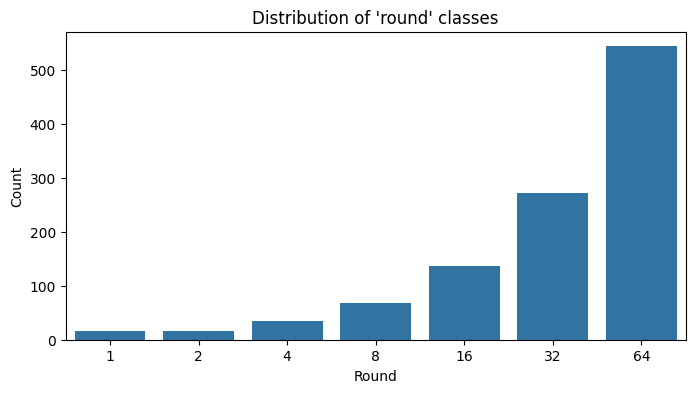

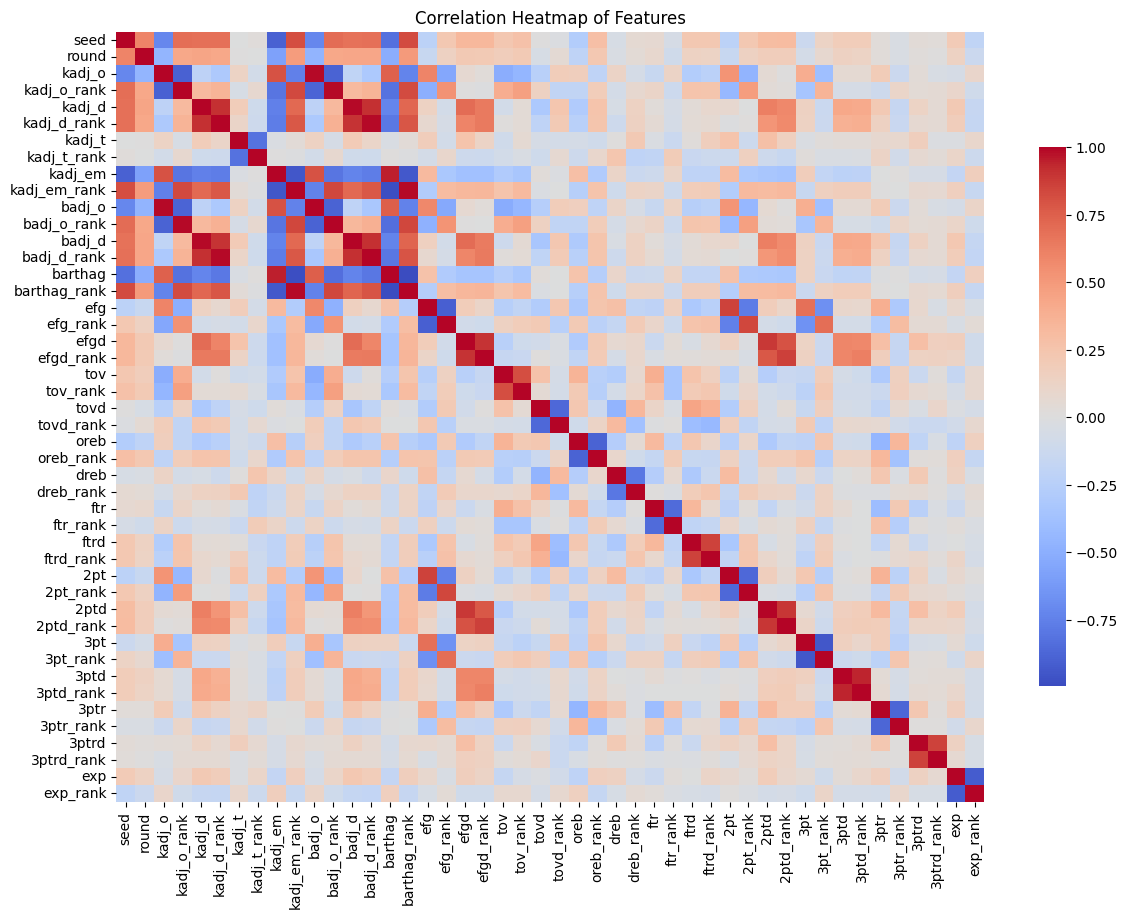

round
64    544
32    272
16    136
8      68
4      34
1      17
2      17
Name: count, dtype: int64

In [ ]:
# Class distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y, order=sorted(y.unique()))
plt.title("Distribution of 'round' classes")
plt.xlabel("Round")
plt.ylabel("Count")
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(rfc_df.corr(), cmap='coolwarm', center=0, cbar_kws={'shrink': 0.7})
plt.title("Correlation Heatmap of Features")
plt.show()

y.value_counts()

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# SOURCE ^: To account for major class imbalance, we will use SMOTE to upsample so the model can predict the rarer classes more
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Random forest classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
# Predictions
y_pred = rfc.predict(X_test)

In [ ]:
# Accuracy
acc = np.trace(pd.crosstab(y_test, y_pred)) / len(y_test)

print(pd.crosstab(y_test,y_pred))

print(acc)

col_0  1   2   4   8   16  32  64
round                            
1       1   1   0   0   0   1   0
2       0   0   0   2   1   0   0
4       1   0   1   2   1   0   2
8       0   1   1   3   5   2   2
16      1   0   1   7   6   6   6
32      0   1   0   6   9  18  21
64      0   0   1   0   7  26  75
0.47706422018348627


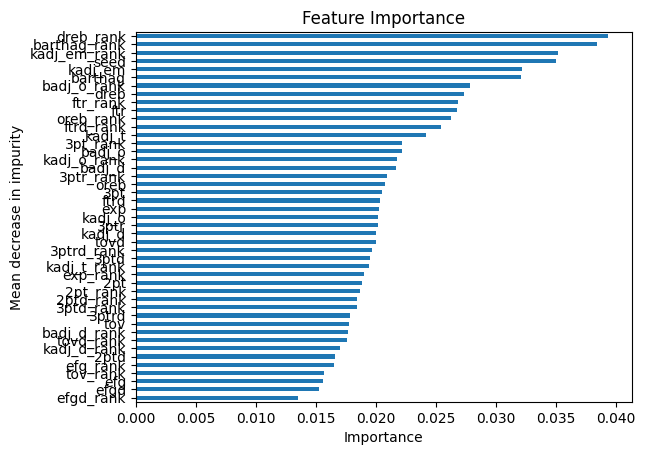

In [ ]:
# Feature importance
feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns )
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Mean decrease in impurity')
plt.show()

Classification Report:
              precision    recall  f1-score     support
1              0.333333  0.333333  0.333333    3.000000
2              0.000000  0.000000  0.000000    3.000000
4              0.250000  0.142857  0.181818    7.000000
8              0.150000  0.214286  0.176471   14.000000
16             0.206897  0.222222  0.214286   27.000000
32             0.339623  0.327273  0.333333   55.000000
64             0.707547  0.688073  0.697674  109.000000
accuracy       0.477064  0.477064  0.477064    0.477064
macro avg      0.283914  0.275435  0.276702  218.000000
weighted avg   0.487331  0.477064  0.481233  218.000000


<Figure size 1000x600 with 0 Axes>

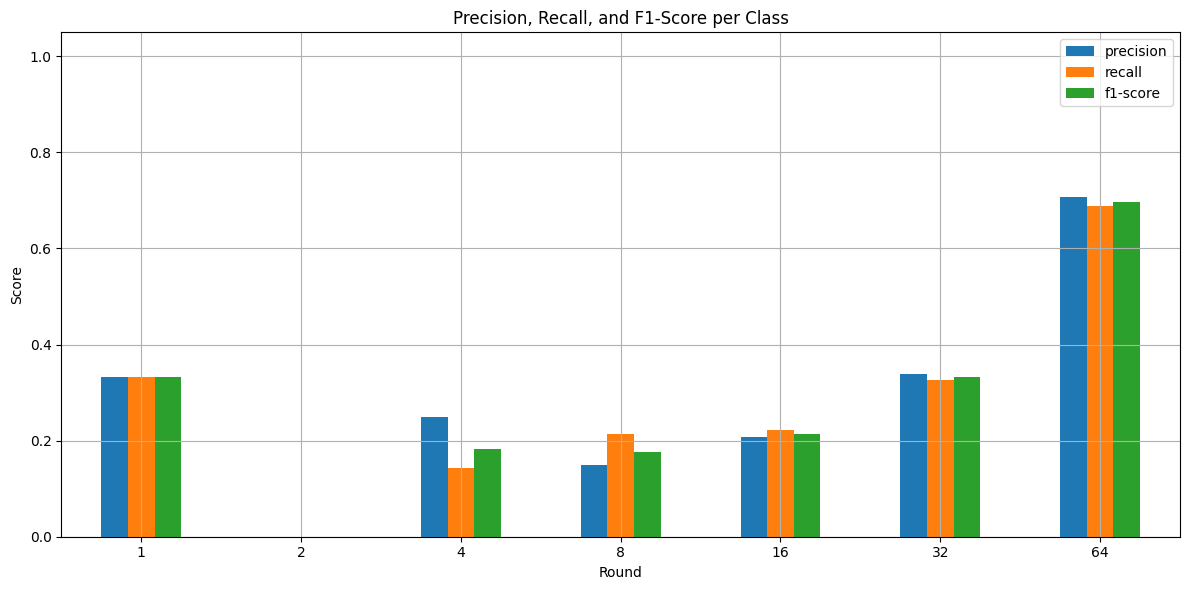

In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, labels=sorted(y.unique()), output_dict=True, zero_division=False)
report_df = pd.DataFrame(report).transpose()

# Show full report as a table
print("Classification Report:")
print(report_df[['precision', 'recall', 'f1-score', 'support']])

# Optional: Visualize precision, recall, and F1 for each class
plt.figure(figsize=(10, 6))
report_df.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title("Precision, Recall, and F1-Score per Class")
plt.xlabel("Round")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

In this approach, a Random Forest classifier was trained using class balancing techniques — SMOTE for oversampling minority classes and class_weight='balanced' to penalize misclassifications relative to class frequency. This dual strategy was effective in mitigating the model's bias toward the dominant 'Round of 64' class, allowing for improved recall and F1-scores across underrepresented outcomes like the Final Four or Championship rounds. This tradeoff reflects a more equitable model that recognizes rare outcomes. Importantly, performance gains were notable for most minority classes, although extremely rare categories like 'Round 2' remain challenging, likely due to limited feature separability and sample scarcity. An overall accuracy of 47% is an okay result with such an unbalanced dataset.

# Approach 3 - Neural Network

# Bonus - Predicting Champion based on Previous Winners

As an extra method prediction is to eliminate every team that missed the minimum threshold for a certain stat (based on the past winners).

In [ ]:
# split into two dataframes, 2025 and past winners
df_2025 = df[df['year'] == 2025]
previous_winners = df[(df['year'] != 2025) & (df['round'] == 1)]
previous_winners

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
75,2024,Connecticut,40,BE,4,1,1,126.608,1,94.3949,...,36.7,30,31.9,67,40.9,89,33.2,50,1.709,283
137,2023,Connecticut,40,BE,1,4,1,119.437,6,94.0686,...,35.7,93,30.0,15,42.0,64,30.3,14,1.724,274
216,2022,Kansas,86,B12,1,1,1,119.389,6,93.8965,...,35.5,75,30.1,26,33.8,275,34.2,71,2.082,150
259,2021,Baylor,14,B12,2,1,1,123.265,3,93.7679,...,41.8,1,34.0,183,39.2,131,34.3,79,1.967,95
378,2019,Virginia,229,ACC,2,1,1,123.571,2,87.9163,...,40.9,4,27.2,1,38.7,174,40.9,264,1.552,214
441,2018,Villanova,228,BE,2,1,1,127.384,1,95.9749,...,39.8,21,32.8,51,46.6,16,35.5,110,1.313,286
480,2017,North Carolina,135,ACC,1,1,1,122.075,4,94.0654,...,36.7,94,34.2,120,30.0,312,39.4,285,1.917,99
568,2016,Villanova,228,BE,4,2,1,118.299,15,91.5520,...,34.4,184,33.5,112,43.8,24,37.5,264,1.709,183
587,2015,Duke,50,ACC,1,1,1,124.253,3,94.9453,...,38.6,27,32.0,66,34.5,166,27.7,15,1.062,331
650,2014,Connecticut,40,Amer,3,7,1,111.355,57,92.2385,...,38.7,26,32.9,95,33.8,154,31.6,129,2.055,79


Only a select few conferences have had a winner in the tournament. Given the dominance of Power 5 programs in the tournament, let's isolate these. We'll also add the Big 10 because they're capable as well despite the lack of champion in recent years.

In [ ]:
# filter by conferences
conf_values = set(previous_winners['conf']) | {'B10'}
print("Conferences with a Champ (since '08):", conf_values)
df_2025 = df_2025[df_2025['conf'].isin(conf_values)]
df_2025

Conferences with a Champ (since '08): {'BE', 'B10', 'SEC', 'ACC', 'B12', 'Amer'}


,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
1,2025,Alabama,3,SEC,2,2,8,126.598,4,96.6919,...,35.0,116,30.8,32,46.2,43,35.1,59,1.819,261
3,2025,Arizona,8,B12,2,4,16,122.567,13,96.8244,...,32.4,250,33.6,171,34.6,295,41.9,285,1.920,225
4,2025,Arkansas,10,SEC,3,10,16,112.943,73,95.2503,...,33.3,204,31.9,75,36.7,242,39.5,206,1.364,341
5,2025,Auburn,12,SEC,4,1,4,128.505,1,93.4663,...,36.8,42,29.2,5,40.6,139,34.8,51,2.573,20
6,2025,Baylor,14,B12,2,9,32,120.886,16,99.7268,...,34.7,131,35.4,279,40.2,150,40.8,254,1.871,245
8,2025,BYU,25,B12,2,6,16,123.050,12,100.6540,...,37.1,33,34.8,246,48.3,16,44.4,332,1.889,239
9,2025,Clemson,33,ACC,1,5,64,118.690,24,94.7724,...,37.2,31,32.2,87,38.4,186,38.3,161,2.503,37
11,2025,Connecticut,40,BE,3,8,32,121.965,14,102.6330,...,35.4,90,35.1,264,42.6,90,34.2,38,1.638,302
12,2025,Creighton,43,BE,4,9,32,116.968,35,98.2653,...,33.9,177,32.7,114,49.0,11,35.2,63,1.954,219
14,2025,Duke,50,ACC,2,1,4,127.999,2,89.8470,...,37.7,22,30.9,36,45.4,52,37.9,148,0.968,361


Let's also eliminate teams that have a lower seed (larger in value) than the lowest champion. This would be 7-seed UConn in 2014.

In [ ]:
# filter by lowest seed
min_seed = previous_winners['seed'].max()
print("Lowest seed:", min_seed)
df_2025 = df_2025[df_2025['seed'] <= min_seed]
df_2025

Lowest seed: 7


,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
1,2025,Alabama,3,SEC,2,2,8,126.598,4,96.6919,...,35.0,116,30.8,32,46.2,43,35.1,59,1.819,261
3,2025,Arizona,8,B12,2,4,16,122.567,13,96.8244,...,32.4,250,33.6,171,34.6,295,41.9,285,1.920,225
5,2025,Auburn,12,SEC,4,1,4,128.505,1,93.4663,...,36.8,42,29.2,5,40.6,139,34.8,51,2.573,20
8,2025,BYU,25,B12,2,6,16,123.050,12,100.6540,...,37.1,33,34.8,246,48.3,16,44.4,332,1.889,239
9,2025,Clemson,33,ACC,1,5,64,118.690,24,94.7724,...,37.2,31,32.2,87,38.4,186,38.3,161,2.503,37
14,2025,Duke,50,ACC,2,1,4,127.999,2,89.8470,...,37.7,22,30.9,36,45.4,52,37.9,148,0.968,361
15,2025,Florida,55,SEC,3,1,1,127.938,3,92.1126,...,35.5,86,29.6,8,43.6,76,37.3,122,1.887,241
20,2025,Houston,76,B12,1,1,2,123.269,11,87.8253,...,39.8,4,30.9,36,34.5,296,43.1,310,2.278,105
21,2025,Illinois,78,B10,1,6,32,121.633,15,98.0448,...,31.1,318,33.3,153,46.9,31,30.4,3,1.177,350
22,2025,Iowa St.,83,B12,4,3,32,119.483,20,92.4824,...,35.8,71,33.2,140,36.9,234,40.7,249,2.401,70


Each statisitic has a rank associated with it. Let's make sure that each team meets the minimum threshold for these ranks as well, based on the previous champions.

In [ ]:
# get every column that is ranked
rank_columns = [col for col in df_2025.columns if 'rank' in col]

# iterate through columns
for col in rank_columns:
    # filter by lowest rank for that stat
    min_stat_rank = previous_winners[col].max()
    df_2025 = df_2025[(df_2025[col] <= min_stat_rank)]

df_2025

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
5,2025,Auburn,12,SEC,4,1,4,128.505,1,93.4663,...,36.8,42,29.2,5,40.6,139,34.8,51,2.573,20
15,2025,Florida,55,SEC,3,1,1,127.938,3,92.1126,...,35.5,86,29.6,8,43.6,76,37.3,122,1.887,241
22,2025,Iowa St.,83,B12,4,3,32,119.483,20,92.4824,...,35.8,71,33.2,140,36.9,234,40.7,249,2.401,70
29,2025,Maryland,109,B10,3,4,16,118.089,28,91.7546,...,37.2,31,30.7,28,35.5,271,35.8,82,1.640,301
52,2025,Texas Tech,204,B12,3,3,8,125.335,6,97.2799,...,37.9,19,31.7,63,44.6,62,34.1,34,1.972,214


At the same time, there's been a ceiling for these ranks. After filtering for that, we will have the teams that fit within the ranks interval for each statistic.

In [ ]:
# iterate through columns
for col in rank_columns:
    # filter by highest rank for that stat
    max_stat_rank = previous_winners[col].min()
    df_2025 = df_2025[(df_2025[col] >= max_stat_rank)]

df_2025

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
15,2025,Florida,55,SEC,3,1,1,127.938,3,92.1126,...,35.5,86,29.6,8,43.6,76,37.3,122,1.887,241
29,2025,Maryland,109,B10,3,4,16,118.089,28,91.7546,...,37.2,31,30.7,28,35.5,271,35.8,82,1.640,301
52,2025,Texas Tech,204,B12,3,3,8,125.335,6,97.2799,...,37.9,19,31.7,63,44.6,62,34.1,34,1.972,214


Now, let's do the same for the rest of the numeric data. However, doing this for every stat will result in an empty result. Therefore, let's only check for the lower bound of the KenPom efficiencies.

In [ ]:
numeric_columns = [col for col in df_2025.columns if df_2025[col].dtype.kind in 'bifc' and col not in ['year', 'round', 'team_id', 'quad_id'] and not col.endswith('rank')]
lower_bound_cols = ['kadj_o', 'kadj_d', 'kadj_em']
numeric_columns = [col for col in numeric_columns if col not in lower_bound_cols]

# filter through lower bound kenpom data
min_kadj_o = previous_winners['kadj_o'].min()
max_kadj_d = previous_winners['kadj_d'].max()
min_kadj_em = previous_winners['kadj_em'].min()
df_2025 = df_2025[(df_2025['kadj_o'] >= max_stat_rank) & (df_2025['kadj_d'] <= max_kadj_d) & (df_2025['kadj_em'] >= min_kadj_em)]

# filter through the rest of the numeric variables
for col in numeric_columns:
    # find min and max of the stat
    min_stat = previous_winners[col].min()
    max_stat = previous_winners[col].max()
    # filter through the stat
    df_2025 = df_2025[(df_2025[col] >= min_stat) & (df_2025[col] <= max_stat)]
df_2025

,year,team,team_id,conf,quad_id,seed,round,kadj_o,kadj_o_rank,kadj_d,...,3pt,3pt_rank,3ptd,3ptd_rank,3ptr,3ptr_rank,3ptrd,3ptrd_rank,exp,exp_rank
15,2025,Florida,55,SEC,3,1,1,127.938,3,92.1126,...,35.5,86,29.6,8,43.6,76,37.3,122,1.887,241


Based on these filters, the predicted champion is Florida. As you can see by the `round` value, this was correct!! We can see this worked for this year, but it won't for every year. For 2024, UConn (the correct champion) was the only team to remain after rank filtering, but didn't pass through the final filtering. For 2023, no team made it past the lower-threshold rank filtering.